# Predictive Analysis on Bank Marketing Dataset :

### Bank Marketing Dataset contains both type variables 'Categorical' and 'Numerical'.
    
#### Categorical Variable includes :

   * Marital - (Married , Single , Divorced)",
   * Job - (Management,Blue-Collar,Technician,entrepreneur,retired,admin.,services,selfemployed,housemaid,student,unemployed,unknown)
   * Contact - (Telephone,Cellular,Unknown)
   * Education - (Primary,Secondary,Tertiary,Unknown)
   * Month - (Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)
   * Poutcome - (Success,Failure,Other,Unknown)
   * Housing - (Yes/No)
   * Loan - (Yes/No)
   * is_success - (Yes/No)
   * Default - (Yes/No)

#### Numerical Variable:
    
   * Age
   * Balance
   * Day
   * Duration
   * Campaign
   * Pdays
   * Previous
    
#### Mean, Standard Deviation, Min, Max, Quantile output of all numerical variable:


            |Description|age     |balance  |duration|campaign|pdays    |previous|day      |
            |-----------|--------|---------|--------|--------|---------|--------|---------|
            |count      |45211.00|45211.00 |45211.00|45211.00|45211.00 |45211.00|45211.00 |
            |-----------|--------|---------|--------|--------|---------|--------|---------|
            |mean       |40.93   |1362.27  |258.16  |2.76    |40.19    |0.58    |15.80    |
            |-----------|--------|---------|--------|--------|---------|--------|---------| 
            |std        |10.61   |3044.76  |257.52  |3.09    |100.12   |2.30    |8.32     |
            |-----------|--------|---------|--------|--------|---------|--------|---------|
            |min        |18.00   |-8019.00 |0.00    |1.00    |-1.00    |0.00    |1.00     |
            |-----------|--------|---------|--------|--------|---------|--------|---------|
            |25%        |33.00   |72.00    |103.00  |1.00    |-1.00    |0.00    |8.00     |
            |-----------|--------|---------|--------|--------|---------|--------|---------|
            |50%        |39.00   |448.00   |180.00  |2.00    |-1.00    |0.00    |16.00    |
            |-----------|--------|---------|--------|--------|---------|--------|---------|
            |75%        |48.00   |1428.00  |319.00  |3.00    |-1.00    |0.00    |21.00    |
            |-----------|--------|---------|--------|--------|---------|--------|---------|
            |max        |95.00   |102127.00|4918.00 |63.00   |871.00   |275.00  |31.00    |
            |-----------|--------|---------|--------|--------|---------|--------|---------|


#### Understanding above table :
   
       ** Outlier :  data_point > (Q3 * 1.5) is said to be outlier where Q3 is 75% Quantile !
    
#### Age:

       ** Average age of the people in the dataset is ~41 with std of 10.61
       ** Min. age is 18
       ** Max. age is 95
       ** quantile 75%(percentile) refers that 75 percentage of the people have 48 or less age.
       ** As 95 is max, there is great chance that its a outlier "48*(3/2) = 72". So anything greater than 72 is outlier.

#### Balance: 

       ** Average balance of the people in the dataset is (approx)1326.27 with std of 3044.76, as standard deviation is quite huge it means that balance is wide spread across the dataset.
       ** Min. balance is -8019
       ** Max. balance is 102127
       ** quantile 75%(percentile) refers that 75 percentage of the people have 1428 or less balance.
       ** while comparing with 75% quantile, 102127 is very huge and its a outlier data point.

#### Duration: 

       ** Average duration of the people speaking in the dataset is (approx)258.16 with std of 257.52, as standard deviation is quite huge it means that duration is wide spread across the dataset.
       ** Min. duration is 0
       ** Max. duration is 4918
       ** quantile 75%(percentile) refers that 75 percentage of the people spoke for 319 seconds or less.
       ** while comparing with 75% quantile, 4918 is a outlier data point.

#### Pdays:

       ** Average no. of days passed after the client was contacted from previous campaign in the dataset is (approx)40.19 with std of 100.12.
       ** Min. pdays is -1
       ** Max. pdays is 871
       ** quantile 75%(percentile),for 75% of records it is -1 days, which means the Client was not contacted.

#### Campaign: 
    
       ** Average no. of contacts performed during the current campaign for a client in the dataset is (approx)2.76 with std of 3.09.
       ** Min. balance is 1
       ** Max. balance is 63
       ** quantile 75%(percentile),for 75% of records, 3 times the client has been contacted in the current campaign for a client.
       ** while comparing with 75% quantile,63 is a outlier data point.
   
#### Previous:
    
       ** Average no. of contacts performed before this campaign for a client in the dataset is (approx)0.58 with std of 2.30.
       ** Min. balance is 0.
       ** Max. balance is 275.
       ** quantile 75%(percentile),for 75% of records, 0 times the client has been contacted before this campaign.
       ** while comparing with 75% quantile,275 is a outlier data point.
   

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score

data = pd.read_csv('/Users/mayurjain/Documents/Fragma ML TEST/August 13/marketing-data.csv',sep=',',header='infer')
data = data.drop(['day','poutcome'],axis=1)

def binaryType_(data):
    
    data.is_success.replace(('yes', 'no'), (1, 0), inplace=True)
    data.default.replace(('yes','no'),(1,0),inplace=True)
    data.housing.replace(('yes','no'),(1,0),inplace=True)
    data.loan.replace(('yes','no'),(1,0),inplace=True)
    data.marital.replace(('married','single','divorced'),(1,2,3),inplace=True)
    data.contact.replace(('telephone','cellular','unknown'),(1,2,3),inplace=True)
    data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    data.education.replace(('primary','secondary','tertiary','unknown'),(1,2,3,4),inplace=True)
    
    return data

data = binaryType_(data)

# for i in range(len(data.marital.unique())):
#     data["marital_"+str(data.marital.unique()[i])] = (data.marital == data.marital.unique()[i]).astype(int)

# for j in range(len(data.job.unique())):
#     data["job_"+str(data.job.unique()[j])] = (data.job == data.job.unique()[j]).astype(int)

# for k in range(len(data.contact.unique())):
#     data["contact_"+str(data.contact.unique()[k])] = (data.contact == data.contact.unique()[k]).astype(int)

# for l in range(len(data.education.unique())):
#     data['education_'+str(data.education.unique()[l])] = (data.education == data.education.unique()[l]).astype(int)

# for n in range(len(data.month.unique())):
#     data['month_'+str(data.month.unique()[n])] = (data.month == data.month.unique()[n]).astype(int)


print(data.is_success.value_counts())
print(data.describe())
print(data.head())


/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0    39922
1     5289
Name: is_success, dtype: int64
                age       marital     education       default        balance  \
count  45211.000000  45211.000000  45211.000000  45211.000000   45211.000000   
mean      40.936210      1.513238      2.224813      0.018027    1362.272058   
std       10.618762      0.692948      0.747997      0.133049    3044.765829   
min       18.000000      1.000000      1.000000      0.000000   -8019.000000   
25%       33.000000      1.000000      2.000000      0.000000      72.000000   
50%       39.000000      1.000000      2.000000      0.000000     448.000000   
75%       48.000000      2.000000      3.000000      0.000000    1428.000000   
max       95.000000      3.000000      4.000000      1.000000  102127.000000   

            housing          loan       contact         month      duration  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.555838      0.160226      2.223707      6.144655    258

#### Below are set of Graph for greater insight into data.

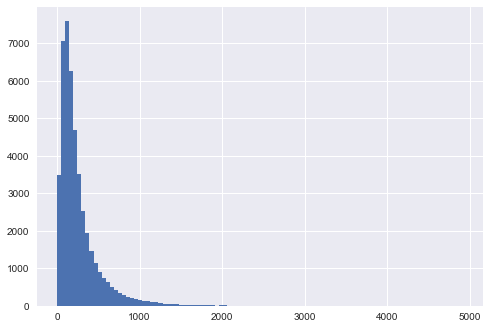

In [2]:
plt.hist((data.duration),bins=100)
plt.show()

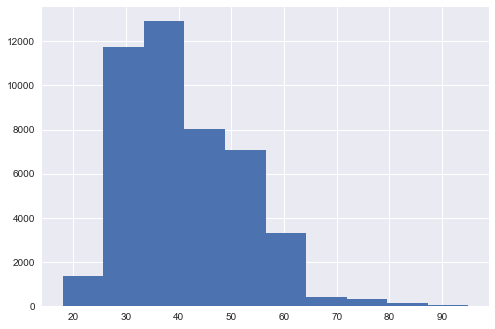

In [3]:
plt.hist(data.age,bins=10)
plt.show()

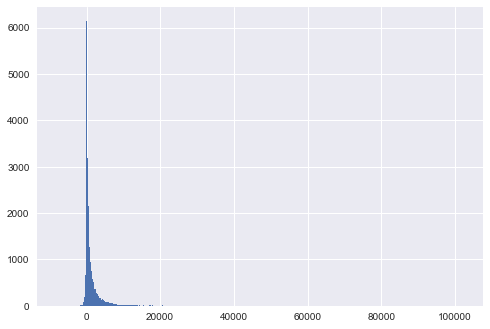

In [4]:
plt.hist(data.balance,bins=1000)
plt.show()

** Above, All the Histogram suggest that data is skewed towards left i.e. existence of skewness brings us to a point that we need to sample the data efficiently while classifiying the train_data and test_data !

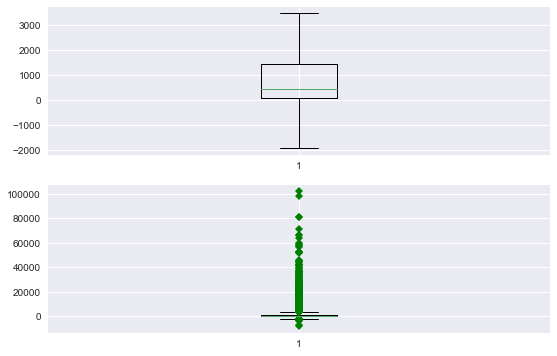

In [5]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(data.balance,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(data.balance,0,'gD')
plt.show()

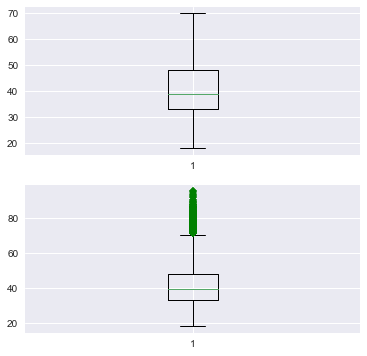

In [6]:
fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(211)
bp = ax.boxplot(data.age,0,'')
ax = fig.add_subplot(212)
bp = ax.boxplot(data.age,0,'gD')
plt.show()

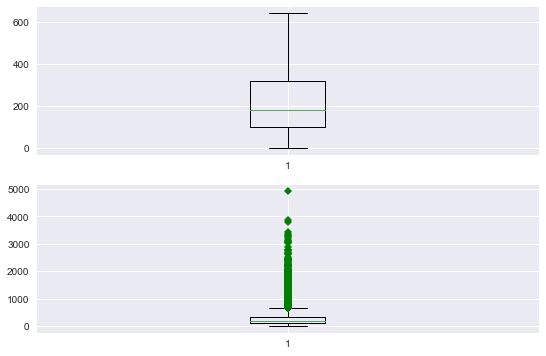

In [7]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(data.duration,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(data.duration,0,'gD')
plt.show()

#### Above boxplot suggest how the data is spread across the dataset


** Most of the data is lying above the 3rd quantile by multiplication factor of 1.5 i.e. by theortical aspect the data points are outlier for most of the data points.


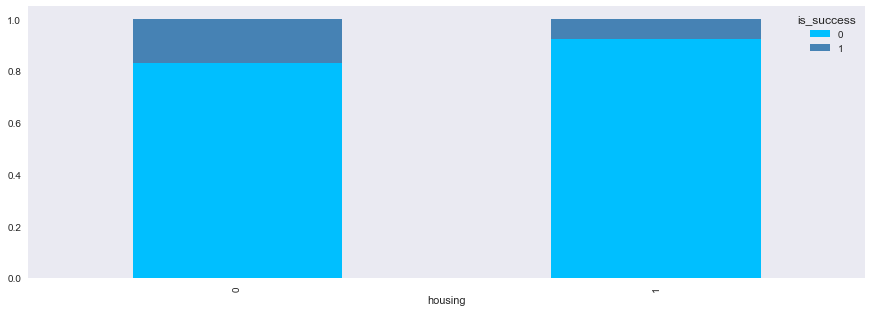

In [8]:
draw_data = pd.crosstab(data.housing, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

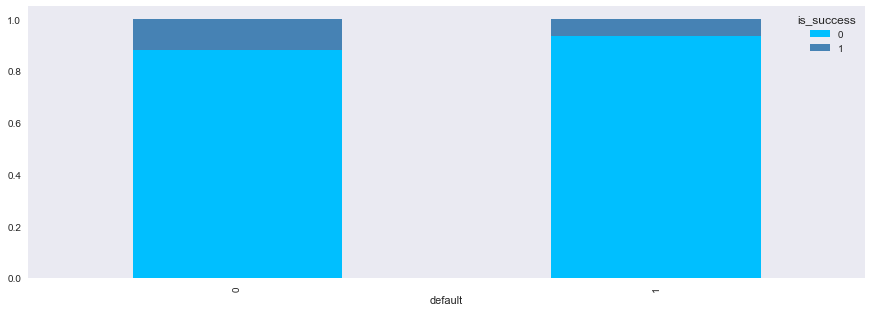

In [9]:
draw_data = pd.crosstab(data.default, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

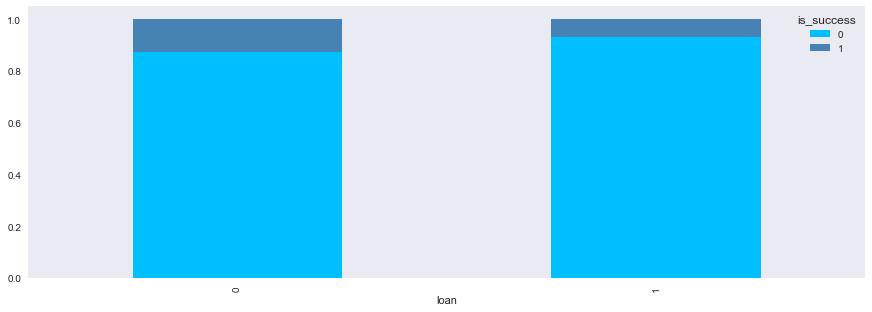

In [10]:
draw_data = pd.crosstab(data.loan, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

#### By looking at the bar graph, we can observe that Feature vs Label the data is wide spread i.e. we cannot predict completely based on feature alone.

### Feature Engineering 


       * First, We can convert the duration from Seconds to Minutes and then making it as categorical feature.
       * Converting the age of the person into categorical feature by segregating the age as Adult , Middle Aged and old.
       * Similarly we can converting the continous feature value into discrete feature value.

In [11]:
data['duration'] = data['duration']/60
def age_(data):
    
    data['Adult'] = 0
    data['Middle_Aged'] = 0
    data['old'] = 0    
    data.loc[(data['age'] <= 35) & (data['age'] >= 18),'Adult'] = 1
    data.loc[(data['age'] <= 60) & (data['age'] >= 36),'Middle_Aged'] = 1
    #data.loc[(data['age'] <= 60) & (data['age'] >= 46),'Elderly'] = 1
    data.loc[data['age'] >=61,'old'] = 1
    
    return data

def campaign_(data):
    
    
    data.loc[data['campaign'] == 1,'campaign'] = 1
    data.loc[(data['campaign'] >= 2) & (data['campaign'] <= 3),'campaign'] = 2
    data.loc[data['campaign'] >= 4,'campaign'] = 3
    
    return data

def duration_(data):
    
    data['t_min'] = 0
    data['t_e_min'] = 0
    data['e_min']=0
    data.loc[data['duration'] <= 5,'t_min'] = 1
    data.loc[(data['duration'] > 5) & (data['duration'] <= 10),'t_e_min'] = 1
    data.loc[data['duration'] > 10,'e_min'] = 1
    
    return data

def pdays_(data):
    data['pdays_not_contacted'] = 0
    data['months_passed'] = 0
    data.loc[data['pdays'] == -1 ,'pdays_not_contacted'] = 1
    data['months_passed'] = data['pdays']/30
    data.loc[(data['months_passed'] >= 0) & (data['months_passed'] <=2) ,'months_passed'] = 1
    data.loc[(data['months_passed'] > 2) & (data['months_passed'] <=6),'months_passed'] = 2
    data.loc[data['months_passed'] > 6 ,'months_passed'] = 3
    
    return data

def previous_(data):
    
    data['Not_Contacted'] = 0
    data['Contacted'] = 0
    data.loc[data['previous'] == 0 ,'Not_Contacted'] = 1
    data.loc[(data['previous'] >= 1) & (data['pdays'] <=99) ,'Contacted'] = 1
    data.loc[data['previous'] >= 100,'Contacted'] = 2
    
    return data

def balance_(data):
    data['Neg_Balance'] = 0
    data['No_Balance'] = 0
    data['Pos_Balance'] = 0
    
    data.loc[~data['balance']<0,'Neg_Balance'] = 1
    data.loc[data['balance'] == 0,'No_Balance'] = 1
    data.loc[(data['balance'] >= 1) & (data['balance'] <= 100),'Pos_Balance'] = 1
    data.loc[(data['balance'] >= 101) & (data['balance'] <= 500),'Pos_Balance'] = 2
    data.loc[(data['balance'] >= 501) & (data['balance'] <= 2000),'Pos_Balance'] = 3
    data.loc[(data['balance'] >= 2001) & (data['balance'] <= 10000),'Pos_Balance'] = 4
    data.loc[data['balance'] >= 10001,'Pos_Balance'] = 5
    
    return data

def job_(data):
    
    data.loc[data['job'] == "management",'job'] = 1
    data.loc[data['job'] == "technician",'job'] = 2
    data.loc[data['job'] == "entrepreneur",'job'] = 3
    data.loc[data['job'] == "blue-collar",'job'] = 4
    data.loc[data['job'] == "retired",'job'] = 5
    data.loc[data['job'] == "admin.",'job'] = 6
    data.loc[data['job'] == "services",'job'] = 7
    data.loc[data['job'] == "self-employed",'job'] = 8
    data.loc[data['job'] == "unemployed",'job'] = 9
    data.loc[data['job'] == "student",'job'] = 10
    data.loc[data['job'] == "housemaid",'job'] = 11
    data.loc[data['job'] == "unknown",'job'] = 12
    
    return data

def marital_(data):
    
    data['married'] = 0
    data['singles'] = 0
    data['divorced'] = 0
    data.loc[data['marital'] == 'married','married'] = 1
    data.loc[data['marital'] == 'singles','singles'] = 1
    data.loc[data['marital'] == 'divorced','divorced'] = 1
    
    return data

def education_(data):
    
    data['primary'] = 0
    data['secondary'] = 0
    data['tertiary'] = 0
    data['unknown'] = 0
    data.loc[data['education'] == 'primary','primary'] = 1
    data.loc[data['education'] == 'secondary','secondary'] = 1
    data.loc[data['education'] == 'tertiary','tertiary'] = 1
    data.loc[data['education'] == 'unknown','unknown'] = 1    
    
    return data

data = campaign_(data)
data = age_(data)
#data = education_(data)
data = balance_(data)
data = job_(data)
data = previous_(data)
data = duration_(data)
data = pdays_(data)
#data = marital_(data)
print(data.columns)

print(data.balance.value_counts())
print(data.duration.value_counts())
print(data.pdays.value_counts())
print(data.campaign.value_counts())
print(data.age.value_counts())

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'is_success', 'Adult', 'Middle_Aged', 'old', 'Neg_Balance',
       'No_Balance', 'Pos_Balance', 'Not_Contacted', 'Contacted', 't_min',
       't_e_min', 'e_min', 'pdays_not_contacted', 'months_passed'],
      dtype='object')
 0        3514
 1         195
 2         156
 4         139
 3         134
 5         113
 6          88
 8          81
 23         75
 10         69
 7          69
 11         65
 25         63
 20         62
 19         60
 15         59
 47         59
 21         59
 49         59
 33         58
 13         57
 53         56
 16         56
 24         55
 79         55
 91         54
 145        54
 46         54
 9          54
 14         53
          ... 
 6205        1
 6320        1
 4394        1
 2327        1
 4404        1
 8460        1
 29312       1
 4362        1
-2049        1
 17332    

### Plotting bar chart :

##### data.Adult vs data.is_success :
    
        The data is spread equally opting for term deposit or not.

##### data.Middle_Aged vs data.is_success :
    
        The data is points out that people opt less for term deposit.

##### data.old vs data.is_success :

        The data is points out that people opt more for term deposit as it covers people who are retired.

##### data.t_min vs data.is_success :

        The data point brings out the fact that if th client is less interested in enrolling for term deposit, he/she is ready to invest less time on call with the agent.
        
        Note : t_min - Five minutes or less

##### data.t_e_min vs data.is_success :

        The data points brings out the fact that if th client is interested in enrolling for term deposit, he/she is ready to investing minimum of 5 to 10 minute time on call with the agent.
        
        Note : t_e_min - greater than Five minutes or more

##### data.e_min vs data.is_success :

        The data points suggest that if th client is very much interested in enrolling for term deposit, he/she is ready to investing more than 10 minute of time on call with the agent.
        
        Note : e_min - greater than ten minutes or more

##### data.pdays_not_contacted vs data.is_success :

        The data points refers to the client who were not contacted in the previous campaign.And it looks like the people are contaced in current campaign are not contacted previously.

##### data.months_passed vs data.is_success :

        The data points refers to the months passed after the client has been contacted before the current campaign.

##### data.Contacted vs data.is_success :
           
        The data points refers to the no. of contact for a client has been contacted before this campaign.Fewer no. of contacts are more likely to enroll for term deposit
        
##### data.not_Contacted vs data.is_success :

        The data points refers that no contact is made for a client before this campaign. Not contacted Clients are less likely to enroll for term deposit

##### data.Pos_Balance vs data.is_success :

        Here, We can clearly see as the balance in the account increases the no. of client enrolling for the term deposit is more and more.

##### data.No_Balance vs data.is_success :

        Here, We can see as the balance in the account is zero, the no. of client enrolling for the term deposit are less.

##### data.Neg_Balance vs data.is_success :

        We can infer that as the balance in the account is -ve, the no. of client enrolling for the term deposit are very less and feature come in place while classifying such data points

##### data.campaign vs data.is_success :

        The data points refers that no. of contact made to a client in this campaign. If a client is contacted once or twice are more likely to enroll than clients who are contacted more than 3 times.

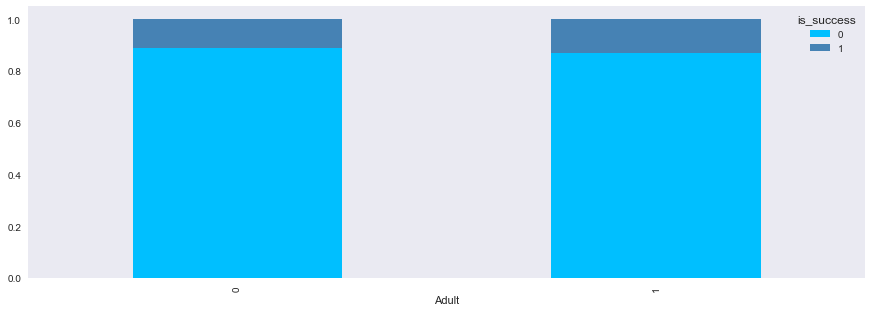

In [12]:
draw_data = pd.crosstab(data.Adult, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

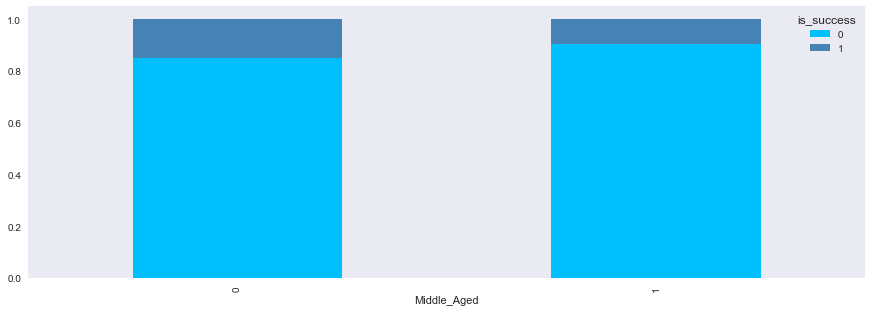

In [13]:
draw_data = pd.crosstab(data.Middle_Aged, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

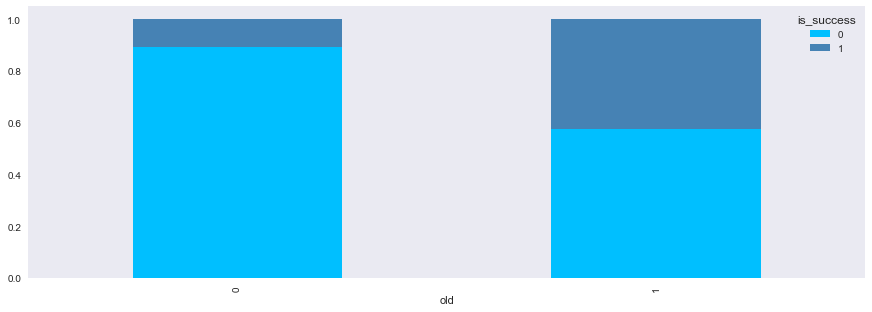

In [14]:
draw_data = pd.crosstab(data.old, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

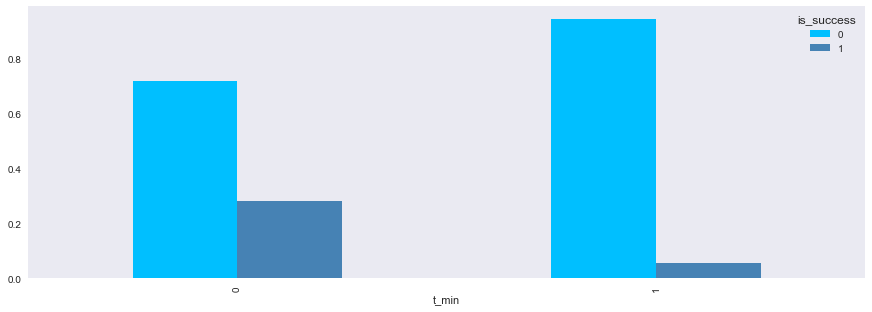

In [15]:
draw_data = pd.crosstab(data.t_min, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

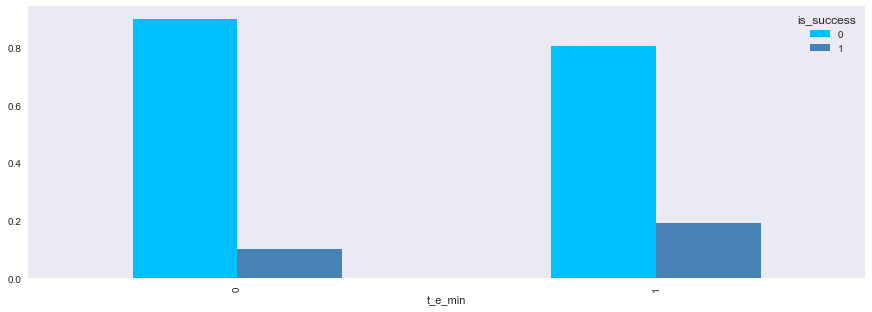

In [16]:
draw_data = pd.crosstab(data.t_e_min, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

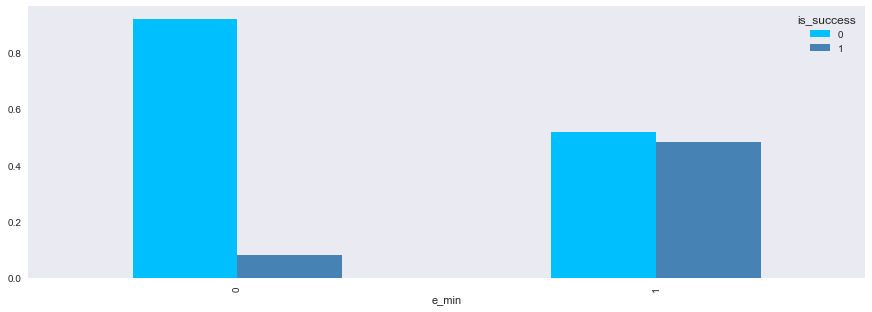

In [17]:
draw_data = pd.crosstab(data.e_min, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

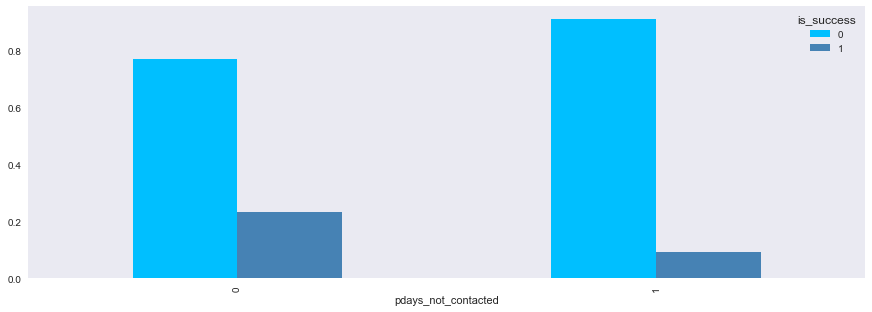

In [18]:
draw_data = pd.crosstab(data.pdays_not_contacted, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

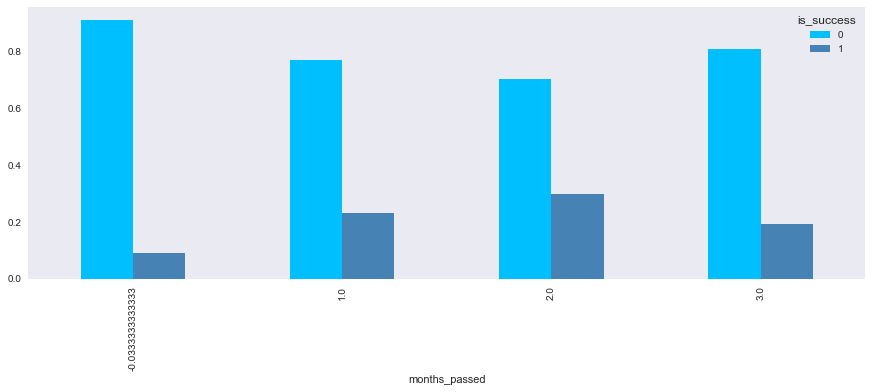

In [19]:
draw_data = pd.crosstab(data.months_passed, data.is_success)
draw_data.div(draw_data.sum(1).astype(int), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

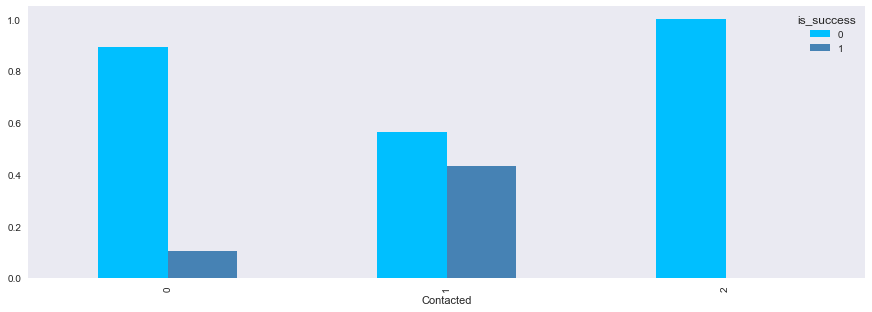

In [20]:
draw_data = pd.crosstab(data.Contacted, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

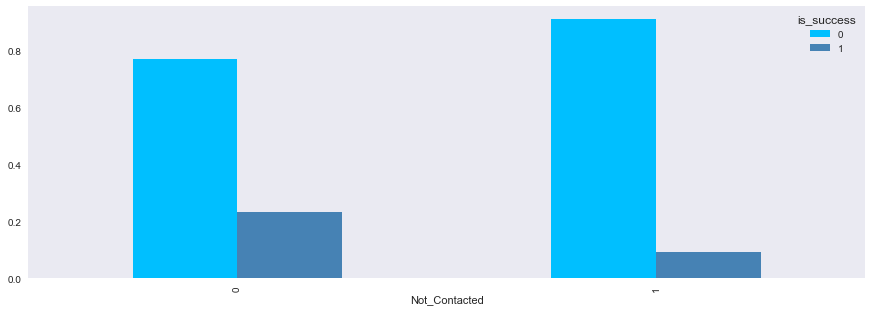

In [21]:
draw_data = pd.crosstab(data.Not_Contacted, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

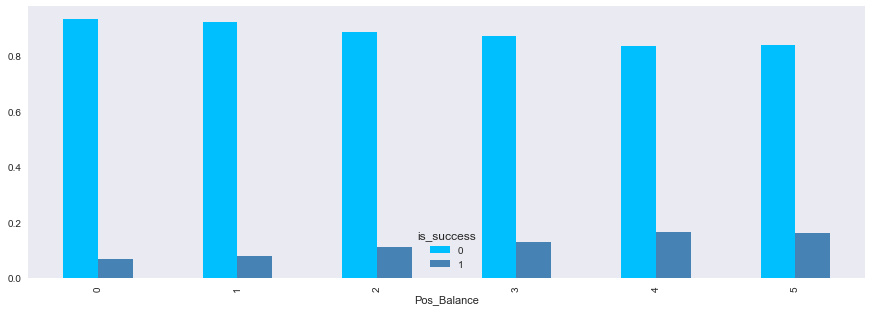

In [22]:
draw_data = pd.crosstab(data.Pos_Balance, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

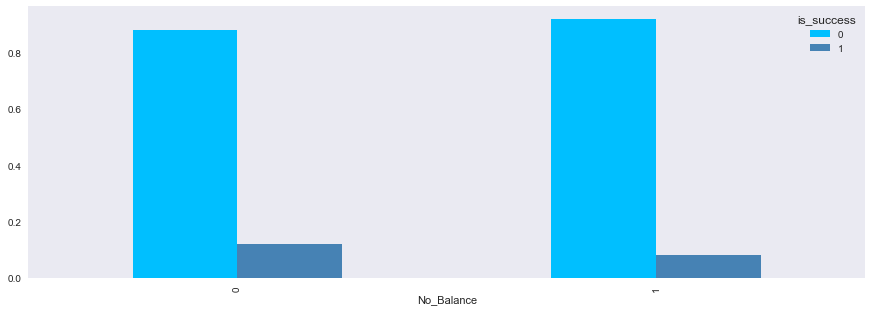

In [23]:
draw_data = pd.crosstab(data.No_Balance, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

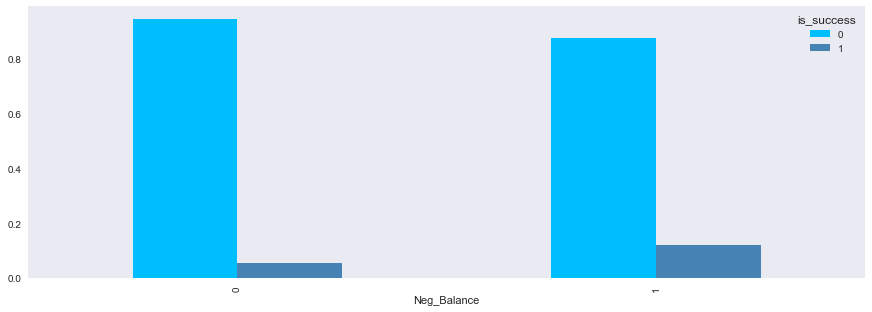

In [24]:
draw_data = pd.crosstab(data.Neg_Balance, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

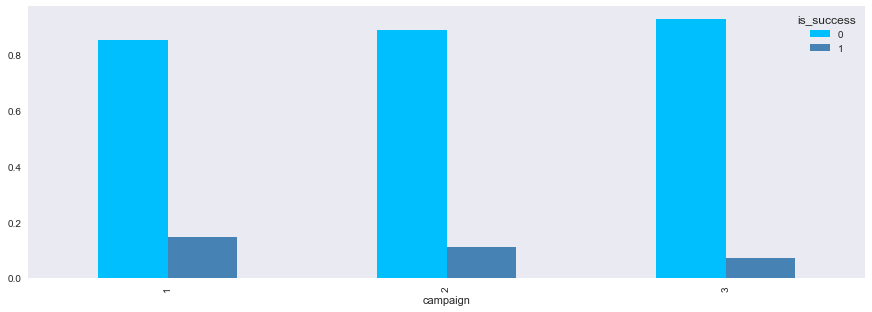

In [25]:
draw_data = pd.crosstab(data.campaign, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

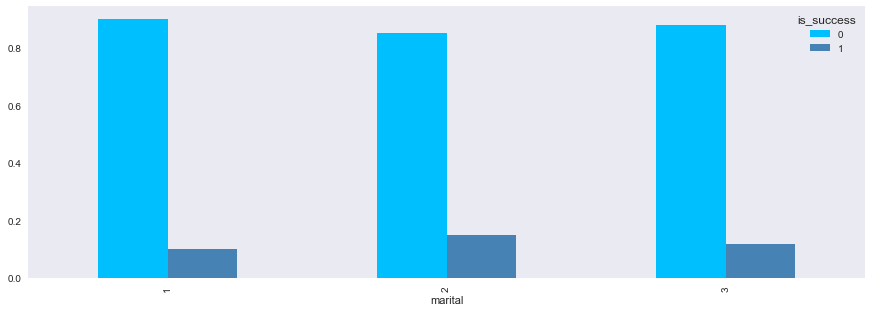

In [26]:
draw_data = pd.crosstab(data.marital, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

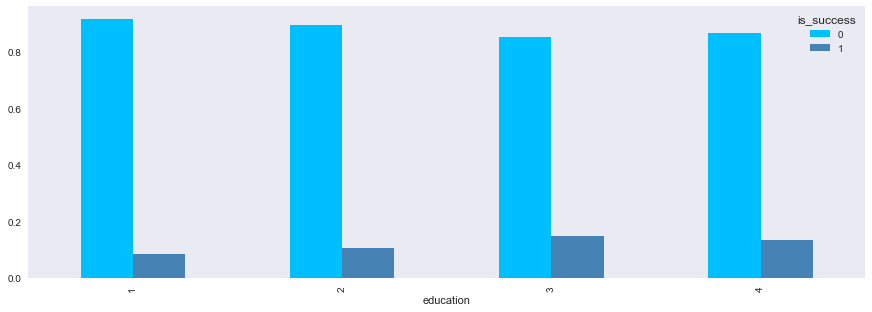

In [27]:
draw_data = pd.crosstab(data.education, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

## Classifiers :

    Based on the values of different parameters we can conclude to the following classifiers for Binary Classification.
    
    1. Gradient Boosting
    2. AdaBoosting
    3. Logistics Regression
    4. Random Forest Classifier
    5. Linear Discriminant Analysis
    6. K Nearest Neighbour
    
    
    And performance metric using precision and recall calculation along with roc_auc_score & accuracy_score

In [28]:
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),'Adaptive Boosting Classifier':AdaBoostClassifier(),'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),'Logistic Regression':LogisticRegression(),'Random Forest Classifier': RandomForestClassifier(),'K Nearest Neighbour':KNeighborsClassifier(8)}#'Decision Tree Classifier':DecisionTreeClassifier(),'Gaussian Naive Bayes Classifier':GaussianNB(),'Support Vector Classifier':SVC(probability=True),}

In [29]:
data_y = pd.DataFrame(data['is_success'])
data_X = data.drop(['is_success','balance','previous','pdays','age','duration'],axis=1)
print(data_X.columns)
log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score","roc-auc_Score"]
#metrics_cols = []
log = pd.DataFrame(columns=log_cols)
#metric = pd.DataFrame(columns=metrics_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'campaign', 'Adult', 'Middle_Aged', 'old', 'Neg_Balance',
       'No_Balance', 'Pos_Balance', 'Not_Contacted', 'Contacted', 't_min',
       't_e_min', 'e_min', 'pdays_not_contacted', 'months_passed'],
      dtype='object')


In [30]:
rs = StratifiedShuffleSplit(n_splits=2, test_size=0.2,random_state=0)
rs.get_n_splits(data_X,data_y)

2

In [31]:
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        roc_auc = roc_auc_score(y_out,y_test)
        f1_score = m.f1_score(y_test,y_out,average='macro')
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc]], columns=log_cols)
        #metric_entry = pd.DataFrame([[precision,recall,f1_score,roc_auc]], columns=metrics_cols)
        log = log.append(log_entry)
        #metric = metric.append(metric_entry)

/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

                     Classifier  Accuracy  Precision Score  Recall Score  \
0  Gradient Boosting Classifier  0.890634         0.737201      0.631822   
0  Gradient Boosting Classifier  0.895278         0.760529      0.634452   
0  Adaptive Boosting Classifier  0.888311         0.727402      0.622308   
0  Adaptive Boosting Classifier  0.890744         0.740040      0.619995   
0  Linear Discriminant Analysis  0.879686         0.706194      0.692858   
0  Linear Discriminant Analysis  0.883114         0.714301      0.695209   
0           Logistic Regression  0.888754         0.730773      0.612719   
0           Logistic Regression  0.889638         0.736509      0.608710   
0      Random Forest Classifier  0.879354         0.696065      0.641014   
0      Random Forest Classifier  0.881566         0.700978      0.629967   
0           K Nearest Neighbour  0.885105         0.715089      0.562686   
0           K Nearest Neighbour  0.886321         0.725560      0.564604   

   F1-Score

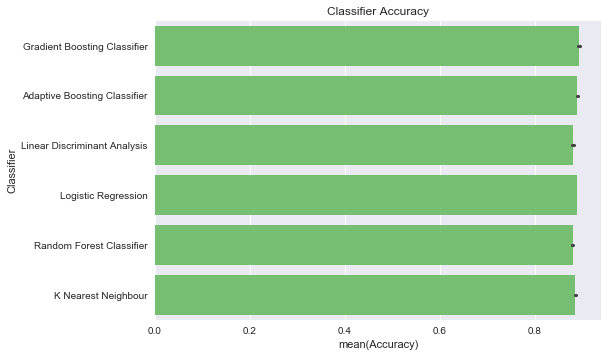

In [32]:
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")  
plt.show()

In [33]:
# rs = ShuffleSplit(n_splits=1, test_size=0.2,random_state=0)
# rs.get_n_splits(data_X,data_y)
# for Name,classify in classifiers.items():
#     for train_index, test_index in rs.split(data_X,data_y):
#         #print("TRAIN:", train_index, "TEST:", test_index)
#         X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
#         y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
#         cls = classify
#         cls =cls.fit(X,y)
#         y_out = cls.predict(X_test)
#         accuracy = accuracy_score(y_test,y_out)
#         precision = m.precision_score(y_test,y_out,average='macro')
#         recall = m.recall_score(y_test,y_out,average='macro')
#         f1_score = m.f1_score(y_test,y_out,average='macro')
#         roc_auc = roc_auc_score(y_out,y_test)
#         log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc]], columns=log_cols)
#         #metric_entry = pd.DataFrame([[precision,recall,f1_score,roc_auc]], columns=metrics_cols)
#         log = log.append(log_entry)
#         #metric = metric.append(metric_entry)
    
# print(log)
# plt.xlabel('Accuracy')
# plt.title('Classifier Accuracy')
# sns.set_color_codes("muted")
# sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")  
# plt.show()

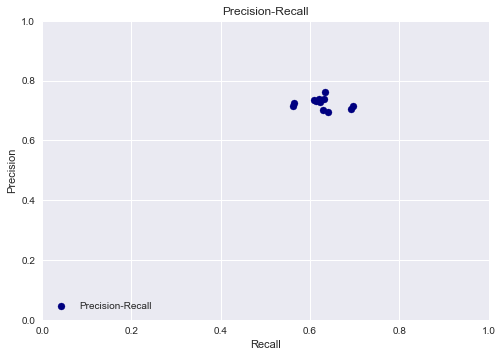

In [34]:
plt.scatter(log['Recall Score'], log['Precision Score'], color='navy',
         label='Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.legend(loc="lower left")
plt.show()

In [35]:
log.to_csv('/Users/mayurjain/Documents/Fragma ML TEST/August 13/marketing-data_Results.csv',sep=',',header='infer')